In [143]:
# Import used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = 'inferno'

# Mixture Models Clustering
## Non probabilistic models
### K-means
*K-means* is a centroid-based clustering algorithm. It's usually considered as the baseline for solving clustering problems.

K-means has some big limitations, which are overcome by other clustering algorithms.

We will see how this simple clustering algorithm works on some toy datasets, enlighting its main limitations.
Then we will show how probabilistic models can overcome them.


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

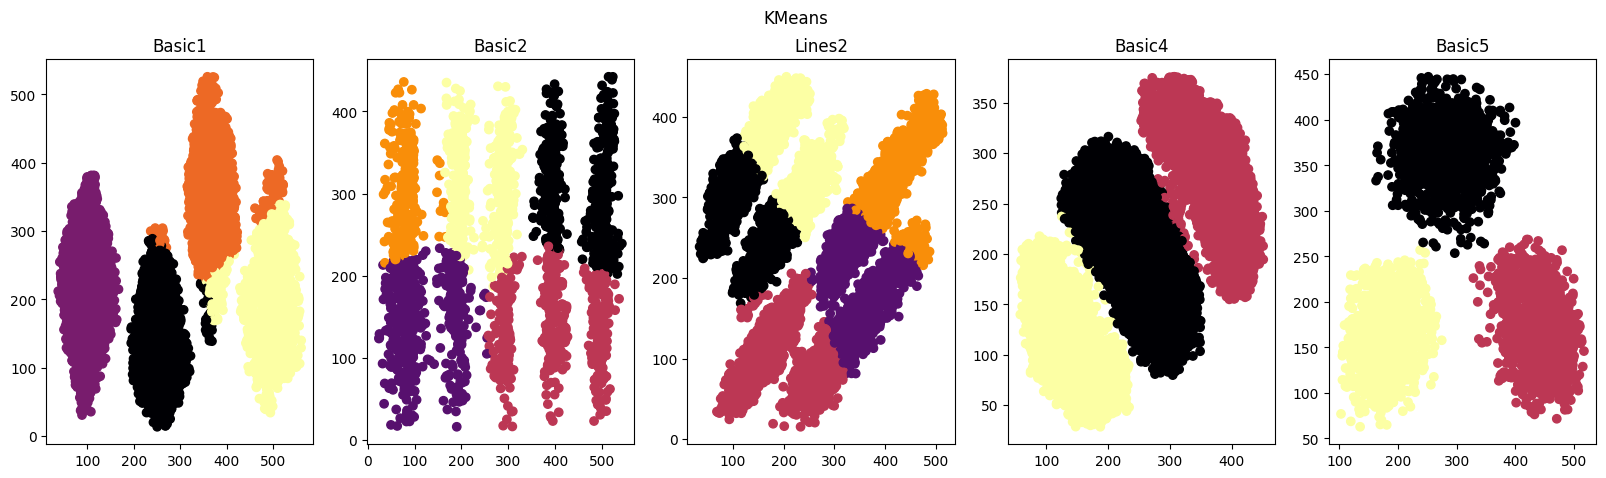

In [144]:
# KMeans
from sklearn.cluster import KMeans

# Load data
df_basic1 = pd.read_csv('./data/basic1.csv')
df_basic2 = pd.read_csv('./data/basic2.csv')
df_lines2 = pd.read_csv('./data/lines2.csv')
df_basic4 = pd.read_csv('./data/basic4.csv')
df_basic5 = pd.read_csv('./data/basic5.csv')

# Apply KMeans
kmeans_basic1 = KMeans(n_clusters=4, random_state=0).fit(df_basic1)
kmeans_basic2 = KMeans(n_clusters=5, random_state=0).fit(df_basic2)
kmeans_lines2 = KMeans(n_clusters=5, random_state=0).fit(df_lines2)
kmeans_basic4 = KMeans(n_clusters=3, random_state=0).fit(df_basic4) 
kmeans_basic5 = KMeans(n_clusters=3, random_state=0).fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=kmeans_basic1.labels_)
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=kmeans_basic2.labels_)
ax[1].set_title('Basic2')
ax[2].scatter(df_lines2['x'], df_lines2['y'], c=kmeans_lines2.labels_)
ax[2].set_title('Lines2')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=kmeans_basic4.labels_)
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=kmeans_basic5.labels_)
ax[4].set_title('Basic5')
fig.suptitle('KMeans')
plt.show()

KMeans doesn't work well with non-circular clusters.

Let's see how GMM works on the same data for comparison.
First we try GMM with EM, using the same number of components as K-means.

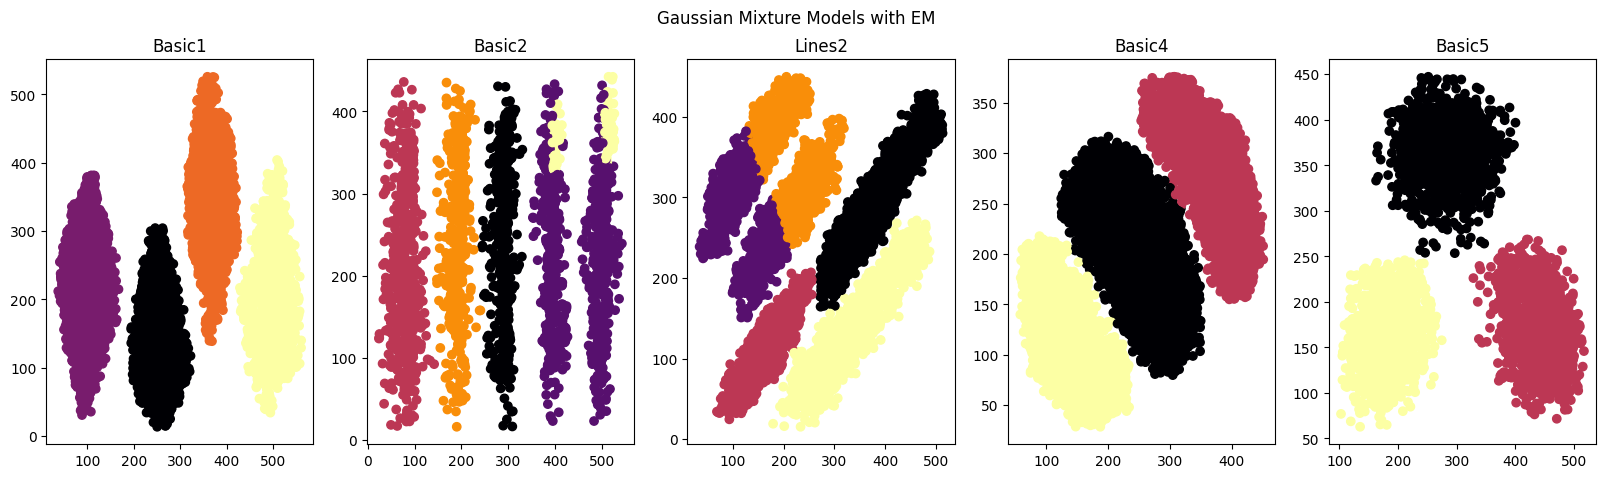

In [145]:
# GMM with EM
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture
gmm_basic1 = GaussianMixture(n_components=4, random_state=0).fit(df_basic1)
gmm_basic2 = GaussianMixture(n_components=5, random_state=0).fit(df_basic2)
gmm_lines2 = GaussianMixture(n_components=5, random_state=0).fit(df_lines2)
gmm_basic4 = GaussianMixture(n_components=3, random_state=0).fit(df_basic4)
gmm_basic5 = GaussianMixture(n_components=3, random_state=0).fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=gmm_basic1.predict(df_basic1))
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=gmm_basic2.predict(df_basic2))
ax[1].set_title('Basic2')
ax[2].scatter(df_lines2['x'], df_lines2['y'], c=gmm_lines2.predict(df_lines2))
ax[2].set_title('Lines2')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=gmm_basic4.predict(df_basic4))
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=gmm_basic5.predict(df_basic5))
ax[4].set_title('Basic5')
fig.suptitle('Gaussian Mixture Models with EM')
plt.show()


As you can see in this example, GMM with EM works better than K-means when the clusters are not in a circular shape, also it is still good with the convex ones. When the clusters are more line-shaped, GMM with EM still shows some limitations, this is probably due to the fact that GMM with EM is just a generalization of K-means, so it has the same limitations, even tho it is a bit more flexible.

A drawback of both these techniques is that they require the number of clusters to be specified.

Now let's see how Bayesian GMM works on this data.

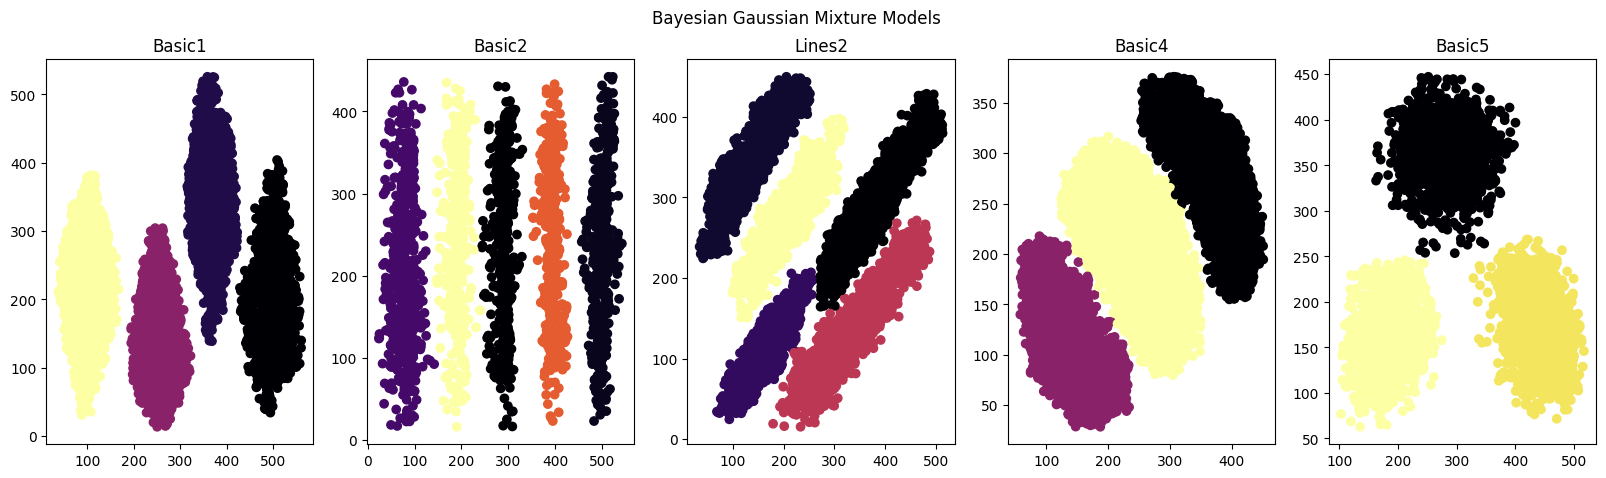

In [146]:
# Bayesian GMM
from sklearn.mixture import BayesianGaussianMixture

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_basic1 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic1)
bgmm_basic2 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic2)
bgmm_lines2 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_lines2)
bgmm_basic4 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic4)
bgmm_basic5 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_basic5)

# Plotting results
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].scatter(df_basic1['x'], df_basic1['y'], c=bgmm_basic1.predict(df_basic1))
ax[0].set_title('Basic1')
ax[1].scatter(df_basic2['x'], df_basic2['y'], c=bgmm_basic2.predict(df_basic2))
ax[1].set_title('Basic2')
ax[2].scatter(df_lines2['x'], df_lines2['y'], c=bgmm_lines2.predict(df_lines2))
ax[2].set_title('Lines2')
ax[3].scatter(df_basic4['x'], df_basic4['y'], c=bgmm_basic4.predict(df_basic4))
ax[3].set_title('Basic4')
ax[4].scatter(df_basic5['x'], df_basic5['y'], c=bgmm_basic5.predict(df_basic5))
ax[4].set_title('Basic5')
fig.suptitle('Bayesian Gaussian Mixture Models')
plt.show()

Bayesian GMM is able to detect the number of clusters automatically, it works better than K-means in the case of non-spherical data, and seems to also detect line-shaped clusters, so it's better overall when compared to the two previous techniques.

### DBSCAN
*Density-Based Special Clustering of Applications with Noise*, commonly know as DBSCAN, is another clustering algorithm. As the name suggests, it belongs to the family of density-based clustering algorithms. It doesn't require the number of clusters to be specified, as Bayesian GMM. Usually it works well with dense, clearly separated clusters, of any shape, even if the separation is not linear.

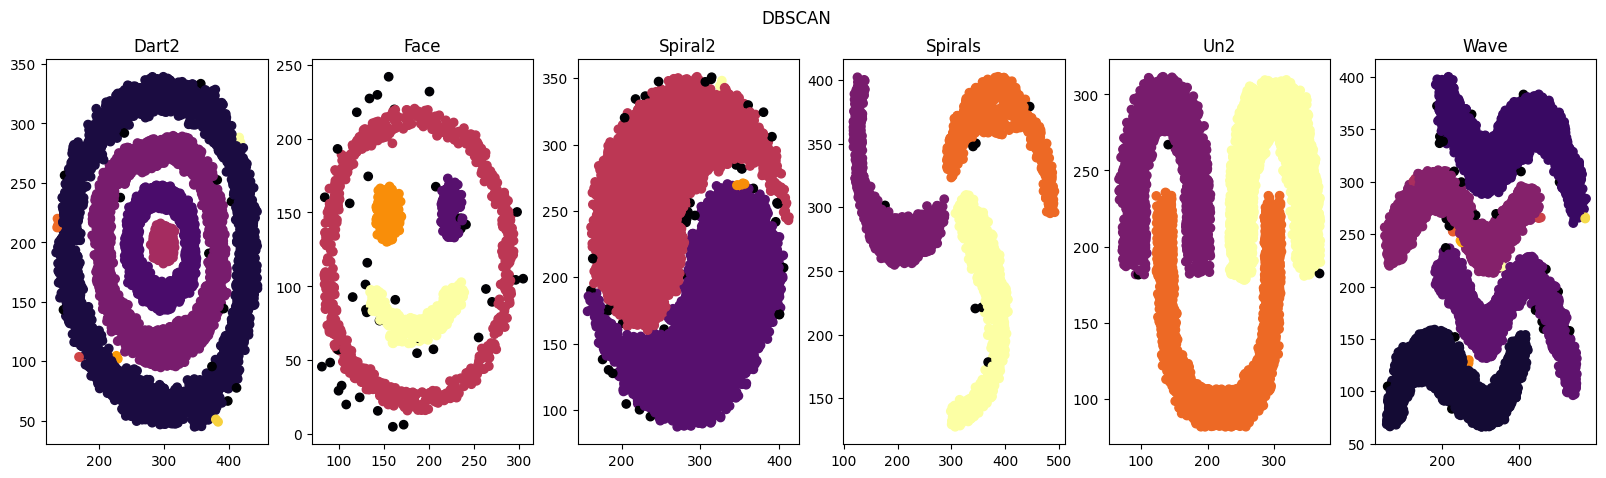

In [147]:
# DBSCAN
from sklearn.cluster import DBSCAN

# Load data
df_dart2 = pd.read_csv('./data/dart2.csv')
df_face = pd.read_csv('./data/face.csv')
df_spiral2 = pd.read_csv('./data/spiral2.csv')
df_spirals = pd.read_csv('./data/spirals.csv')
df_un2 = pd.read_csv('./data/un2.csv')
df_wave = pd.read_csv('./data/wave.csv')

# Apply DBSCAN
dbscan_dart2 = DBSCAN(eps=6, min_samples=2).fit(df_dart2)
dbscan_face = DBSCAN(eps=9, min_samples=4).fit(df_face)
dbscan_spiral2 = DBSCAN(eps=5, min_samples=3).fit(df_spiral2)
dbscan_spirals = DBSCAN(eps=7, min_samples=4).fit(df_spirals)
dbscan_un2 = DBSCAN(eps=7, min_samples=5).fit(df_un2)
dbscan_wave = DBSCAN(eps=6, min_samples=2).fit(df_wave)

# Plotting results
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].scatter(df_dart2['x'], df_dart2['y'], c=dbscan_dart2.labels_)
ax[0].set_title('Dart2')
ax[1].scatter(df_face['x'], df_face['y'], c=dbscan_face.labels_)
ax[1].set_title('Face')
ax[2].scatter(df_spiral2['x'], df_spiral2['y'], c=dbscan_spiral2.labels_)
ax[2].set_title('Spiral2')
ax[3].scatter(df_spirals['x'], df_spirals['y'], c=dbscan_spirals.labels_)
ax[3].set_title('Spirals')
ax[4].scatter(df_un2['x'], df_un2['y'], c=dbscan_un2.labels_)
ax[4].set_title('Un2')
ax[5].scatter(df_wave['x'], df_wave['y'], c=dbscan_wave.labels_)
ax[5].set_title('Wave')
fig.suptitle('DBSCAN')
plt.show()

This experiment confirms that DBSCAN works well with non-linearly separable data.

The main flaw that has been found during these tests, is that the hyperparameters of DBSCAN are not easy to tune, and they can have a big impact on the results.

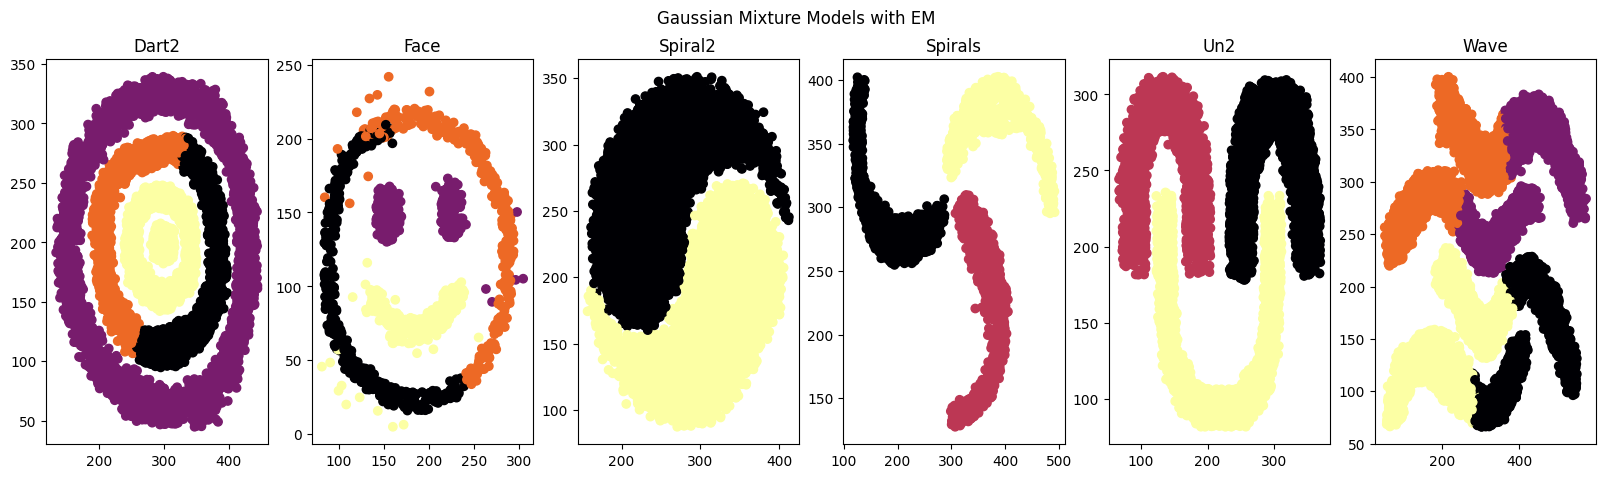

In [148]:
# GMM with EM

# Apply GMM with EM
gmm_dart2 = GaussianMixture(n_components=4, random_state=0).fit(df_dart2)
gmm_face = GaussianMixture(n_components=4, random_state=0).fit(df_face)
gmm_spiral2 = GaussianMixture(n_components=2, random_state=0).fit(df_spiral2)
gmm_spirals = GaussianMixture(n_components=3, random_state=0).fit(df_spirals)
gmm_un2 = GaussianMixture(n_components=3, random_state=0).fit(df_un2)
gmm_wave = GaussianMixture(n_components=4, random_state=0).fit(df_wave)

# Plotting results
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].scatter(df_dart2['x'], df_dart2['y'], c=gmm_dart2.predict(df_dart2))
ax[0].set_title('Dart2')
ax[1].scatter(df_face['x'], df_face['y'], c=gmm_face.predict(df_face))
ax[1].set_title('Face')
ax[2].scatter(df_spiral2['x'], df_spiral2['y'], c=gmm_spiral2.predict(df_spiral2))
ax[2].set_title('Spiral2')
ax[3].scatter(df_spirals['x'], df_spirals['y'], c=gmm_spirals.predict(df_spirals))
ax[3].set_title('Spirals')
ax[4].scatter(df_un2['x'], df_un2['y'], c=gmm_un2.predict(df_un2))
ax[4].set_title('Un2')
ax[5].scatter(df_wave['x'], df_wave['y'], c=gmm_wave.predict(df_wave))
ax[5].set_title('Wave')
fig.suptitle('Gaussian Mixture Models with EM')
plt.show()

DBSCAN usually works better than K-means when the data is not linearly separable, this should be still valid when comparing DBSCAN vs GMM with EM, but this experiment showed that in some cases GMM with EM can still detect some degree of non-linearity, so it puts itself between K-means and DBSCAN.

/usr/local/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


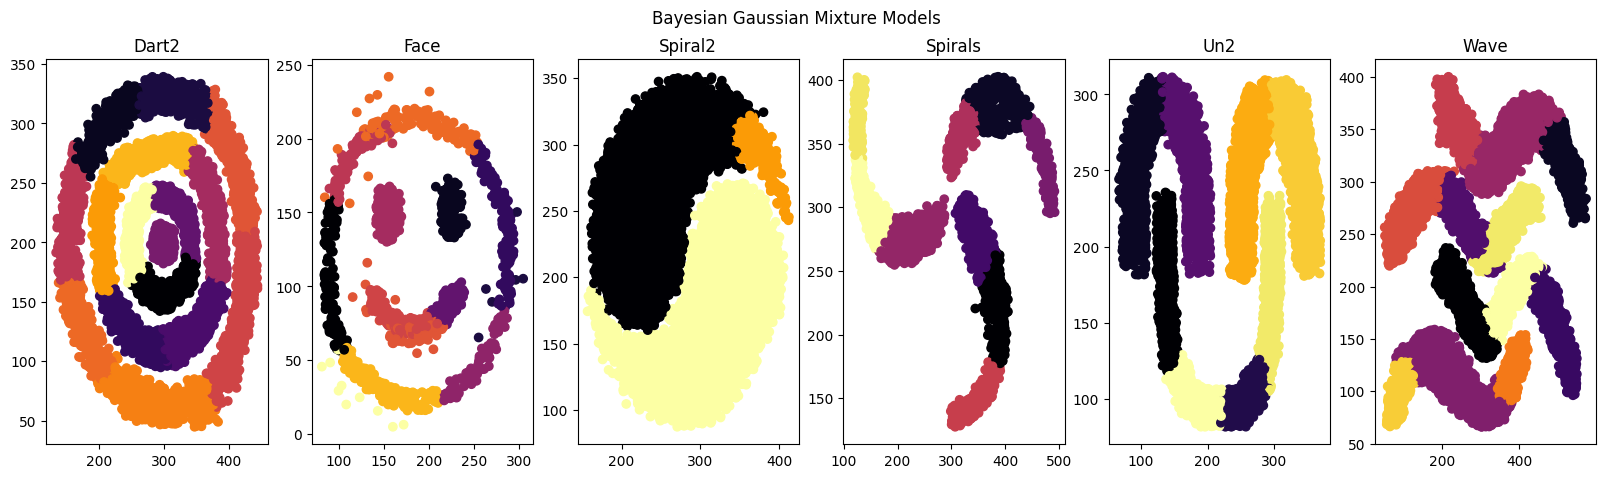

In [149]:
# Bayesian GMM

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_dart2 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_dart2)
bgmm_face = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_face)
bgmm_spiral2 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_spiral2)
bgmm_spirals = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_spirals)
bgmm_un2 = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_un2)
bgmm_wave = BayesianGaussianMixture(n_components=20, random_state=0).fit(df_wave)

# Plotting results
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].scatter(df_dart2['x'], df_dart2['y'], c=bgmm_dart2.predict(df_dart2))
ax[0].set_title('Dart2')
ax[1].scatter(df_face['x'], df_face['y'], c=bgmm_face.predict(df_face))
ax[1].set_title('Face')
ax[2].scatter(df_spiral2['x'], df_spiral2['y'], c=bgmm_spiral2.predict(df_spiral2))
ax[2].set_title('Spiral2')
ax[3].scatter(df_spirals['x'], df_spirals['y'], c=bgmm_spirals.predict(df_spirals))
ax[3].set_title('Spirals')
ax[4].scatter(df_un2['x'], df_un2['y'], c=bgmm_un2.predict(df_un2))
ax[4].set_title('Un2')
ax[5].scatter(df_wave['x'], df_wave['y'], c=bgmm_wave.predict(df_wave))
ax[5].set_title('Wave')
fig.suptitle('Bayesian Gaussian Mixture Models')
plt.show()

In the case of non-linearly separable data BGMM showed that it isn't able to infer autonomously the actual number of components, in the following this will be forced as in the case of GMM with EM and K-means.

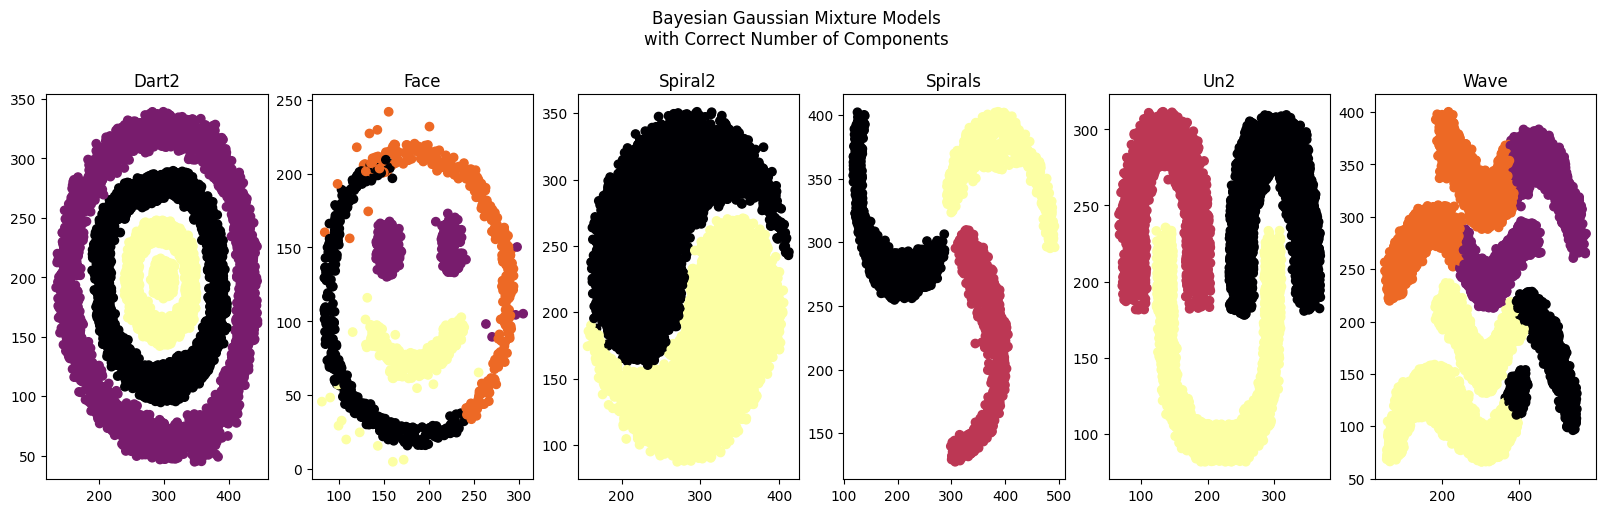

In [150]:
# Bayesian GMM

# Apply Bayesian Gaussian Mixture
## sklearn's implementation of Bayesian GMM requires the number of components to be specified, 
## but if the actual number of components is lower, the model will converge to the correct number of components
bgmm_dart2 = BayesianGaussianMixture(n_components=4, random_state=0).fit(df_dart2)
bgmm_face = BayesianGaussianMixture(n_components=4, random_state=0).fit(df_face)
bgmm_spiral2 = BayesianGaussianMixture(n_components=2, random_state=0).fit(df_spiral2)
bgmm_spirals = BayesianGaussianMixture(n_components=3, random_state=0).fit(df_spirals)
bgmm_un2 = BayesianGaussianMixture(n_components=3, random_state=0).fit(df_un2)
bgmm_wave = BayesianGaussianMixture(n_components=4, random_state=0).fit(df_wave)

# Plotting results
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].scatter(df_dart2['x'], df_dart2['y'], c=bgmm_dart2.predict(df_dart2))
ax[0].set_title('Dart2')
ax[1].scatter(df_face['x'], df_face['y'], c=bgmm_face.predict(df_face))
ax[1].set_title('Face')
ax[2].scatter(df_spiral2['x'], df_spiral2['y'], c=bgmm_spiral2.predict(df_spiral2))
ax[2].set_title('Spiral2')
ax[3].scatter(df_spirals['x'], df_spirals['y'], c=bgmm_spirals.predict(df_spirals))
ax[3].set_title('Spirals')
ax[4].scatter(df_un2['x'], df_un2['y'], c=bgmm_un2.predict(df_un2))
ax[4].set_title('Un2')
ax[5].scatter(df_wave['x'], df_wave['y'], c=bgmm_wave.predict(df_wave))
ax[5].set_title('Wave')
fig.suptitle('Bayesian Gaussian Mixture Models\nwith Correct Number of Components', y=1.05)
plt.show()

Even BGMM has the same problem of GMM with EM and K-means when the clusters are non-linearly separable, but in a limited way. It is able to detect a higher degree of non-linearity than GMM with EM, but the number of components needs to be specified, so the main advantage of Bayesian GMM is lost.


### Hierarchical clustering
*Hierarchical clustering* is a method for clustering. It creates groups so that objects within a group are similar to each other and different from objects that belong to another group. 
Different approches to solve the Hierarchical problem include Agglomerative (bottom-up) and Divisive (top-down).
## Probabilistic models
### Bayesian Gaussian Mixture Models
### Bayesian Mixture Models with other distributions
### Mixture Models with EM
### Model comparisons